In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib line


In [4]:
!wget --no-check-certificate -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2018-11-16 16:04:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: 'teleCust1000t.csv'

     0K .......... .......... .......... ......               100% 3.28M=0.01s

2018-11-16 16:04:30 (3.28 MB/s) - 'teleCust1000t.csv' saved [37048/37048]



In [6]:
df=pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [10]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276E8D49198>]],
      dtype=object)

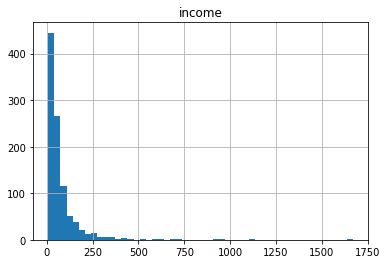

In [13]:
df.hist(column='income',bins=50)

In [15]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [29]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
X=np.asanyarray(X)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [32]:
y=df.custcat
y=np.asanyarray(y)
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [37]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('Train:',X_train.shape,y_train.shape)
print('test:',X_test.shape,y_test.shape)

Train: (800, 11) (800,)
test: (200, 11) (200,)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
clf=knn.fit(X_train,y_train)
print(clf)
pred=clf.predict(X_test)
print(pred)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')
[1 3 3 4 4 3 3 4 2 4 1 4 2 1 3 1 3 3 3 4 3 2 1 1 1 3 2 1 1 2 3 1 4 4 1 2 1
 1 2 2 1 2 1 1 4 1 3 1 4 4 2 1 2 3 2 3 4 3 1 4 1 4 2 3 2 1 1 2 2 1 1 3 2 3
 2 1 1 1 2 3 3 1 2 2 4 2 3 3 1 2 2 2 1 1 1 1 2 2 3 4 2 3 3 1 1 4 2 2 1 2 1
 2 2 4 1 2 1 3 2 3 4 1 2 3 1 1 2 3 1 3 3 1 1 2 2 2 2 2 1 2 1 4 4 1 1 2 1 1
 2 2 1 2 4 3 2 3 3 3 3 2 2 1 1 1 1 4 1 1 3 1 3 3 3 2 2 2 1 4 1 1 1 1 1 3 3
 1 2 1 4 1 3 1 3 3 3 1 1 3 2 3]


In [54]:
from sklearn import metrics
print('train set accuracy:',metrics.accuracy_score(y_train,clf.predict(X_train)))
print('TEST set accuacy:',metrics.accuracy_score(y_test,pred))

train set accuracy: 0.5375
TEST set accuacy: 0.315


In [64]:
#to check in k
ks=25
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
for k in range(1,ks):
    knn=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf=knn.fit(X_train,y_train)
    pred=clf.predict(X_test)
    mean_acc[k-1]=metrics.accuracy_score(y_test,pred)
    
    std_acc[k-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])
    

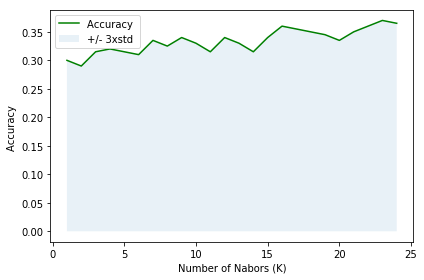

In [67]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()